In [1]:
import os, shutil 
from PIL import Image 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 



In [ ]:
folder = "MicroCT_Test/"

image = Image.open(folder + "scaled_2x.png")

img_lanczos = image.resize((256, 256), Image.LANCZOS)
img_lanczos.save(folder + "lanczos_2x.png")
img_bicubic = image.resize((256, 256), Image.BICUBIC)
img_bicubic.save(folder + "bicubic_2x.png")
img_nearest = image.resize((256, 256), Image.NEAREST)
img_nearest.save(folder + "nearest_2x.png")
img_bilinear = image.resize((256, 256), Image.BILINEAR)
img_bilinear.save(folder + "bilinear_2x.png")



In [17]:
img_original = Image.open(folder + "original.png")
img_swinir = Image.open(folder + "swinir_2x.png")

In [95]:
img_lanczos = np.array(img_lanczos)
img_bicubic = np.array(img_bicubic)
img_nearest = np.array(img_nearest)
img_bilinear = np.array(img_bilinear)
img_original = np.array(img_original)
img_swinir = np.array(img_swinir)

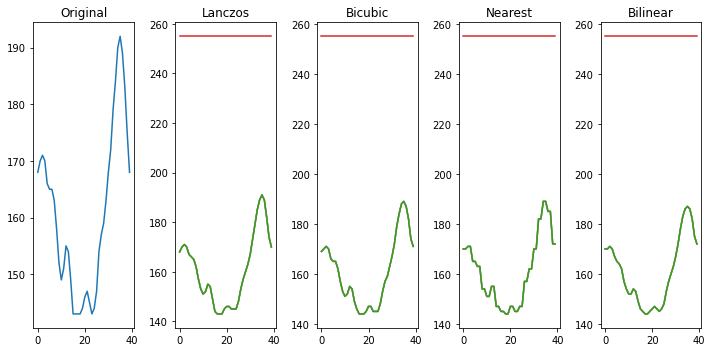

In [89]:


# plot subplots comparing original slice to each of the other 4 horizontally
plt.figure(figsize=(10, 5))
plt.subplot(1, 5, 1)
plt.plot(slice_original)
plt.title("Original")
plt.subplot(1, 5, 4)
plt.plot(slice_nearest)
plt.title("Nearest")
plt.subplot(1, 5, 5)
plt.plot(slice_bilinear)
plt.title("Bilinear")
plt.subplot(1, 5, 2) 
plt.plot(slice_lanczos)
plt.title("Lanczos")
plt.subplot(1, 5, 3)
plt.plot(slice_bicubic)
plt.title("Bicubic")
plt.tight_layout()


In [139]:
slice_lanczos = img_lanczos[216:256, 60]
slice_bicubic = img_bicubic[216:256, 60,0]
slice_nearest = img_nearest[216:256, 60,0]
slice_bilinear = img_bilinear[216:256, 60]
slice_original = img_original[216:256, 60,0]
slice_swinir = img_swinir[216:256, 60]
slice_nearest.shape

(40,)

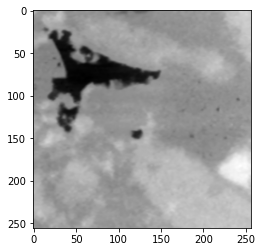

In [146]:
plt.imshow(img_original)

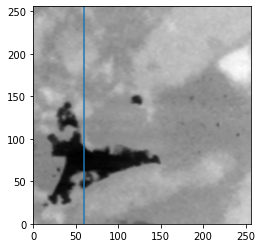

In [147]:
plt.imshow(img_original)
# plot line in y axis at x = 60 and y between 216 and 256

plt.xlim(0, 256)
plt.ylim(0, 256)
# plot line y axis


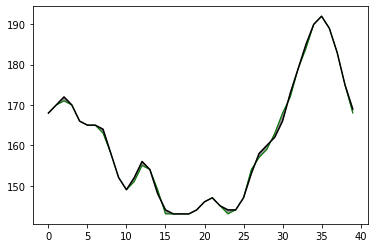

In [141]:

#ax1.set_title('interpolation=False')
plt.plot(range(0,40),slice_original, color="green", label="Original", linewidth=1, linestyle="-")
plt.plot(range(0,40),slice_swinir, color="black")
plt.fill_between(range(0,40),slice_original, slice_swinir, where=(slice_original != slice_swinir), color='black', alpha=0.4, interpolate=True)



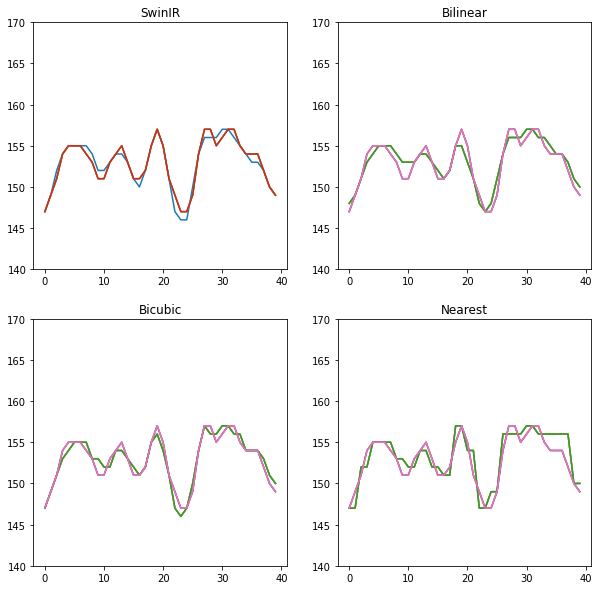

(200.0, 150.0)

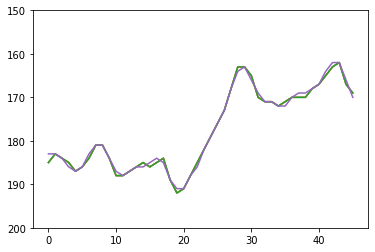

In [44]:
plt.plot(img_original[210:256, 150], label="Original")
plt.plot(img_swinir[210:256, 150], label="SwinIR")
#plt.plot(img_lanczos[210:256, 150], label="Lanczos")
#plt.plot(img_bicubic[210:256, 150], label="Bicubic")
#plt.plot(img_nearest[210:256, 150], label="Nearest")

# show the plot between 200 and 150 y-axis
plt.ylim(200, 150)



In [ ]:
def single_psnr_image(image_name, res="2x"):

    X = Image.open(f"folder+ {image_name}")
    X = convert_tensor(X)
    Y = Image.open(f"folder+ {image_name}")
    Y = convert_tensor(Y)
    psnr = PSNR()
    psnr_swinir = psnr(X, Y)
    Y2 = Image.open(f"folder+ {image_name}")
    Y2 = convert_tensor(Y2)
    psnr2 = PSNR()
    psnr_rcan = psnr2(X, Y2)   
    Y3 = Image.open(f"folder+ {image_name}")
    Y3 = convert_tensor(Y3)
    psnr3 = PSNR()
    psnr_nearest = psnr3(X, Y3)   

    return round(float(psnr_swinir),2), round(float(psnr_rcan),2), round(float(psnr_nearest),2)

def single_ssim_image(image_name, res="2x"):
    imageA = cv2.imread(f"folder+ /{image_name}")
    imageB = cv2.imread(f"folder+ {image_name}")
    imageC = cv2.imread(f"folder+ {image_name}")
    imageD = cv2.imread(f"folder+ {image_name}")


    # 4. Convert the images to grayscale
    grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
    grayC = cv2.cvtColor(imageC, cv2.COLOR_BGR2GRAY)
    grayD = cv2.cvtColor(imageD, cv2.COLOR_BGR2GRAY)


    # 5. Compute the Structural Similarity Index (SSIM) between the two
    #    images, ensuring that the difference image is returned
    (ssim_swinir, _) = structural_similarity(grayA, grayB, full=True)
    #diff = (diff * 255).astype("uint8")   
    (ssim_rcanit, _) = structural_similarity(grayA, grayC, full=True)
    #diff = (diff * 255).astype("uint8")
    (ssim_nearest, _) = structural_similarity(grayA, grayD, full=True)


    return round(float(ssim_swinir),2), round(float(ssim_rcanit),2), round(float(ssim_nearest),2)